# Plots for the paper

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob-big.fits'
tb = fits.open(path)
data = tb[1].data 


In [3]:
mask_knot = data['Knot_Probability']>0.8
mask_bar = data['Bar_Probability']>0.8
mask_disc = data['Disc_Probability']>0.8

In [14]:
from astropy.coordinates import SkyCoord
import astropy.units as u

gal = SkyCoord(data['GLON'], data['GLAT'], frame='galactic', unit=u.deg)


In [46]:
path = '/Users/dhortadarrington/Desktop/MW_edgeon.jpeg'
img = plt.imread(path)

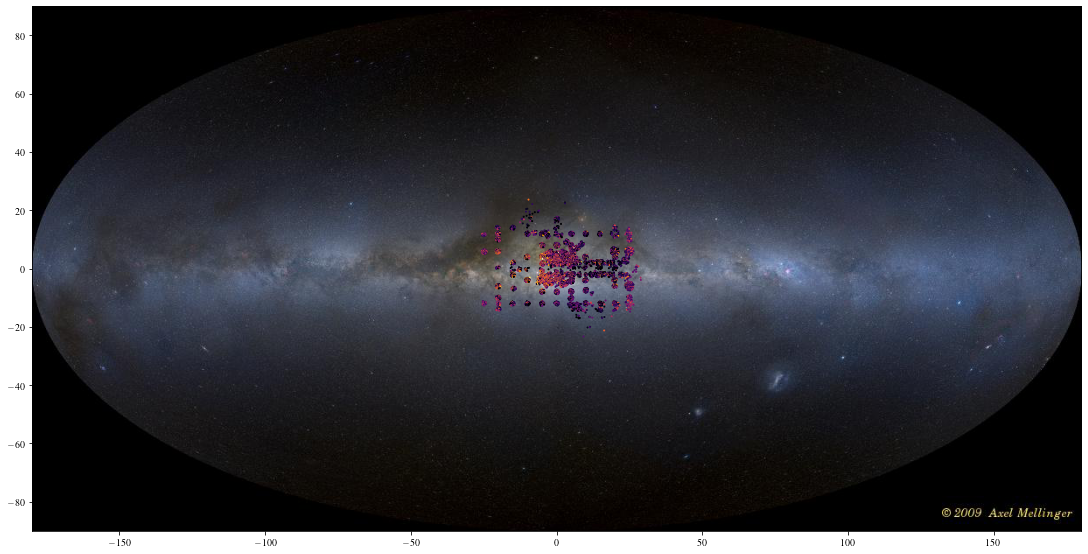

In [52]:
fig, axes = plt.subplots(1, 1,figsize=(15,8),facecolor='white',constrained_layout=True)

# plt.subplot(111, projection="aitoff")
# plt.grid(True)
color = plt.scatter(gal.l.wrap_at('180d'), gal.b,s=1,c=data['weighted_dist']/1000,cmap='inferno',vmin=5,vmax=11)
plt.imshow(img,extent=(-180,180,-90,90))

# cax = fig.inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,ax=axes,orientation='horizontal')
# cbar.set_label(label=r'$d_{\odot}$ [kpc]',fontsize=40)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

# axes[0].set_xlabel('$l$ [$^{\circ}$]',fontsize=40)
# axes[0].set_ylabel('$b$ [$^{\circ}$]',fontsize=40)

# axes[0].tick_params(labelsize=20,length=14)
# axes[0].tick_params(which='major',labelsize=20,length=14)
# axes[0].minorticks_on()




In [53]:
path2 = '/Users/dhortadarrington/Documents/Projects/mw-bar/plots/mw-projection.tiff'
img2 = plt.imread(path2)

In [73]:
x = data['X_2']*8.178 - 8.178
y = data['Y_2']*8.178 
z = data['Z_2']*8.178 

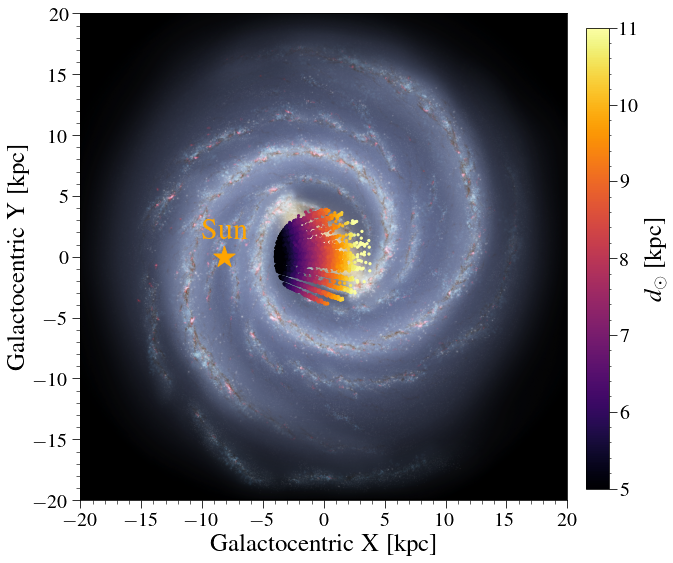

In [129]:
# fig, axes = plt.subplots(1, 1,figsize=(10,10),facecolor='white',constrained_layout=True)
fig= plt.figure(figsize=(8,8),facecolor='white',constrained_layout=True)
# plt.subplot(111, projection="aitoff")
# plt.grid(True)
plt.imshow(img2,extent=(-20,20,-20,20))
plt.scatter(-8.178,0,s=500,c='orange',marker='*')
plt.text(-10.,1.5,'Sun',fontsize=30,color='orange')
plt.xlabel('Galactocentric X [kpc]',fontsize=25)
plt.ylabel('Galactocentric Y [kpc]',fontsize=25)
plt.tick_params(labelsize=20,length=8)
plt.tick_params(which='minor', length=4)
plt.tick_params(which='major',labelsize=20,length=8)
plt.minorticks_on()

color = plt.scatter(data['X_2']*8.178 - 8.178,data['Y_2']*8.178,s=5,c=data['weighted_dist']/1000,cmap='inferno',vmin=5,vmax=11)
# color = plt.scatter(x[np.abs(z)<0.3],y[np.abs(z)<0.3],s=5,c=data['vR'][np.abs(z)<0.3]*220.,cmap='coolwarm',vmin=-50,vmax=50)
cax = fig.add_axes([1.01,0.14,0.04,0.8])
cb = plt.colorbar(cax=cax)
cb.set_label(label=r'$d_{\odot}$ [kpc]',fontsize=25)
cb.ax.tick_params(labelsize=20)

plt.tick_params(labelsize=20,length=8)
plt.tick_params(which='major',labelsize=20,length=8)
plt.minorticks_on()


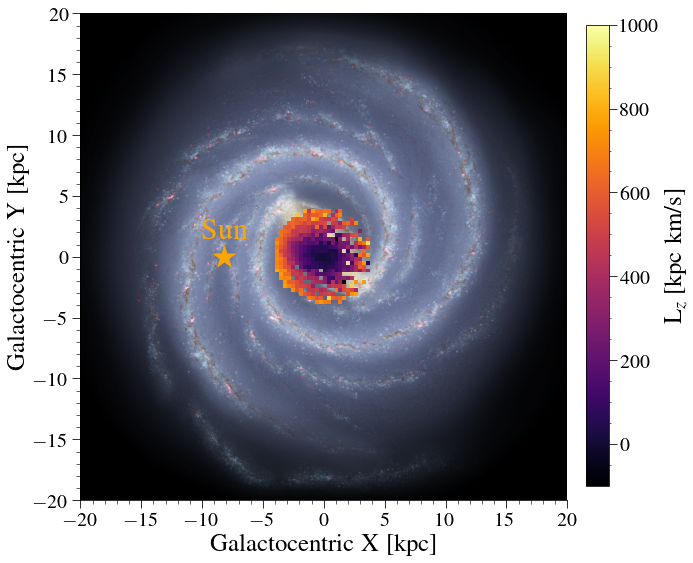

In [204]:
from scipy import stats
# fig, axes = plt.subplots(1, 1,figsize=(10,10),facecolor='white',constrained_layout=True)
fig= plt.figure(figsize=(8,8),facecolor='white',constrained_layout=True)
# plt.subplot(111, projection="aitoff")
# plt.grid(True)
plt.imshow(img2,extent=(-20,20,-20,20))
plt.scatter(-8.178,0,s=500,c='orange',marker='*')
plt.text(-10.,1.5,'Sun',fontsize=30,color='orange')
plt.xlabel('Galactocentric X [kpc]',fontsize=25)
plt.ylabel('Galactocentric Y [kpc]',fontsize=25)
plt.tick_params(labelsize=20,length=8)
plt.tick_params(which='minor', length=4)
plt.tick_params(which='major',labelsize=20,length=8)
plt.minorticks_on()


binx = np.linspace(np.min(x),np.max(x),25)
biny = np.linspace(np.min(y),np.max(y),25)    
hist = stats.binned_statistic_2d(x,y,data['Lz']*220.*8.178, statistic='mean', bins=[binx,biny])
plot_x, plot_y = np.meshgrid(binx,biny) 
color = plt.pcolormesh(plot_x, plot_y, hist[0].T, cmap='inferno',vmin=-100,vmax=1000)

# color = plt.scatter(data['X_2']*8.178 - 8.178,data['Y_2']*8.178,s=5,c=data['vT']*220,cmap='inferno',vmin=0,vmax=250)
# color = plt.scatter(x[np.abs(z)<0.3],y[np.abs(z)<0.3],s=5,c=data['vR'][np.abs(z)<0.3]*220.,cmap='coolwarm',vmin=-50,vmax=50)
cax = fig.add_axes([1.01,0.145,0.04,0.8])
cb = plt.colorbar(cax=cax)
cb.set_label(label=r'L$_{z}$ [kpc km/s]',fontsize=25)
cb.ax.tick_params(labelsize=20)

plt.tick_params(labelsize=20,length=8)
plt.tick_params(which='major',labelsize=20,length=8)
plt.minorticks_on()


In [140]:
lz = data['Lz']*8.178*220.

In [179]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


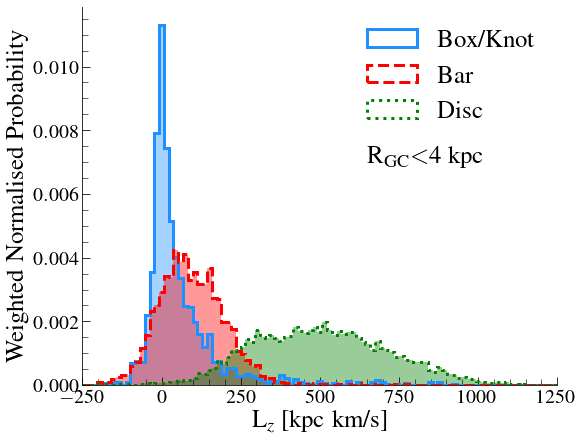

In [191]:
plt.figure(figsize=(8,6),constrained_layout=True,facecolor='white')
bins_lz = np.linspace(-250,1250,100)

plt.hist(lz,bins_lz,weights=data['Knot_probability'],density=True,color='dodgerblue',alpha=0.4)
plt.hist(lz,bins_lz,weights=data['Knot_probability'],density=True,color='dodgerblue',histtype='step',lw=3,label='Box/Knot')

plt.hist(lz,bins_lz,weights=data['Bar_probability'],density=True,color='r',alpha=0.4)
plt.hist(lz,bins_lz,weights=data['Bar_probability'],density=True,color='r',histtype='step',lw=3,label='Bar',ls='dashed')

plt.hist(lz,bins_lz,weights=data['Disc_probability'],density=True,color='g',alpha=0.4)
plt.hist(lz,bins_lz,weights=data['Disc_probability'],density=True,color='g',histtype='step',lw=3,label='Disc',ls='dotted')
plt.legend(loc='upper right',fontsize=25,frameon=False)
plt.text(650,0.007,r'R$_{\mathrm{GC}}$$<$4 kpc',fontsize=25)

plt.xlabel('L$_{z}$ [kpc km/s]',fontsize=25)
plt.ylabel('Weighted Normalised Probability',fontsize=25)
plt.tick_params(labelsize=20,length=12)
plt.tick_params(which='minor', length=6,direction='in')
plt.tick_params(which='major',labelsize=20,length=8,direction='in')
plt.minorticks_on()
plt.xlim(-250,1250)
plt.show()


In [173]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True